In [8]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [9]:
dataset = pd.read_csv('student-mat.csv')


In [10]:
dataset.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [11]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
print("Total Missing Values :",sum(dataset.isnull().sum()))

Total Missing Values : 0


ValueError: num must be 1 <= num <= 30, not 31

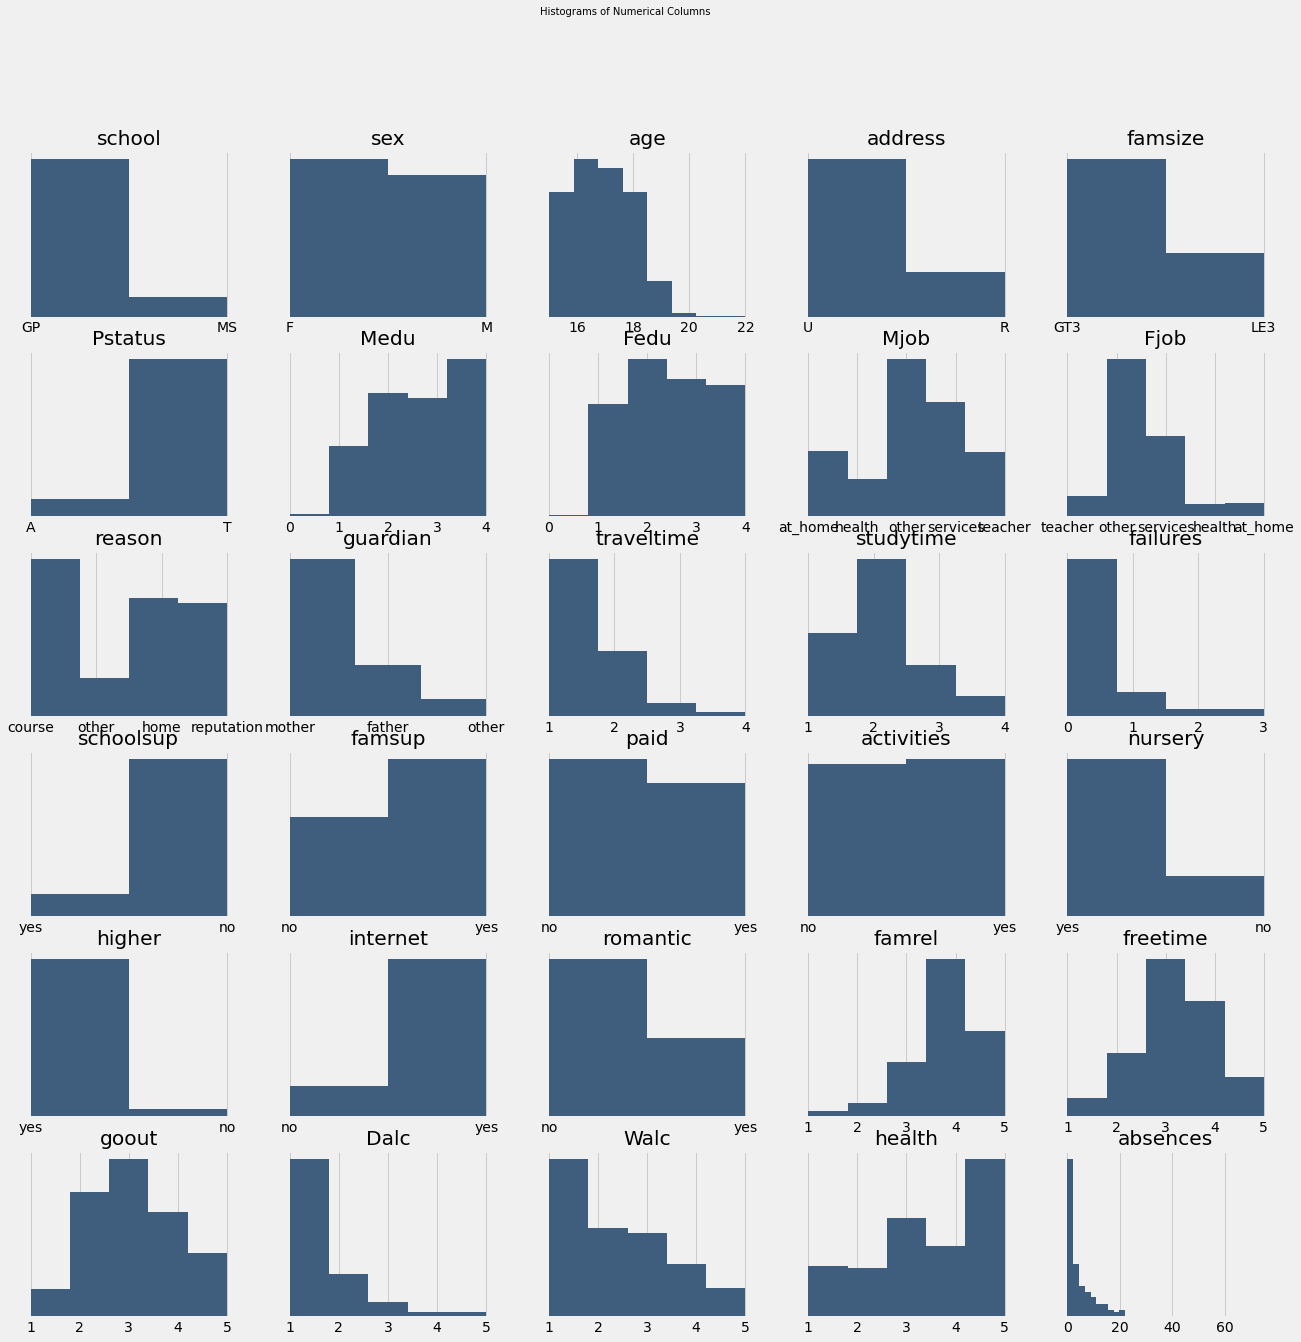

In [13]:
dataset2 = dataset.drop(columns = ['Mjob', 'Fjob','reason','guardian'
])
fig = plt.figure(figsize=(20, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=10)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset.columns.values[i - 1])

    vals = np.size(dataset.iloc[:, i - 1].unique())
    
    plt.hist(dataset.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.06, 1, 0.95])

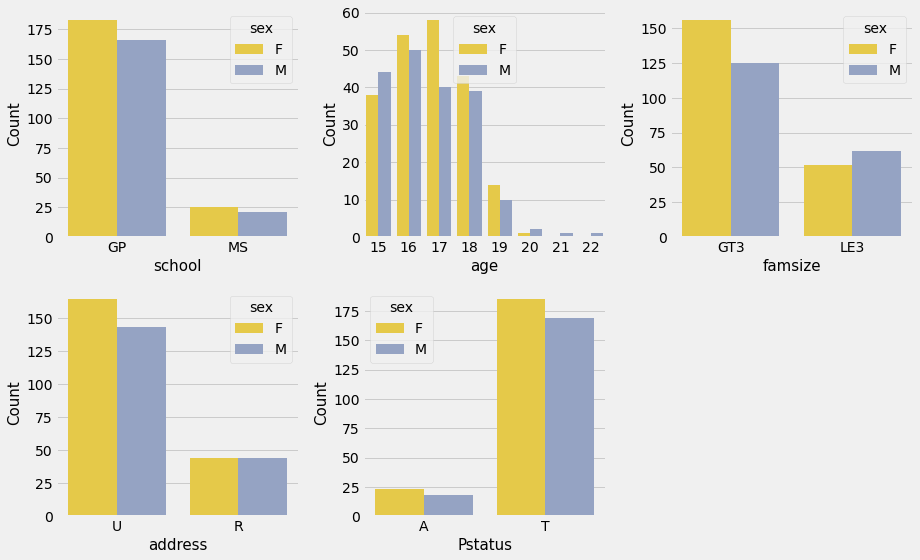

In [14]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['school','age','famsize','address','Pstatus']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(13,8)
    sn.countplot(x=col,data=dataset,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

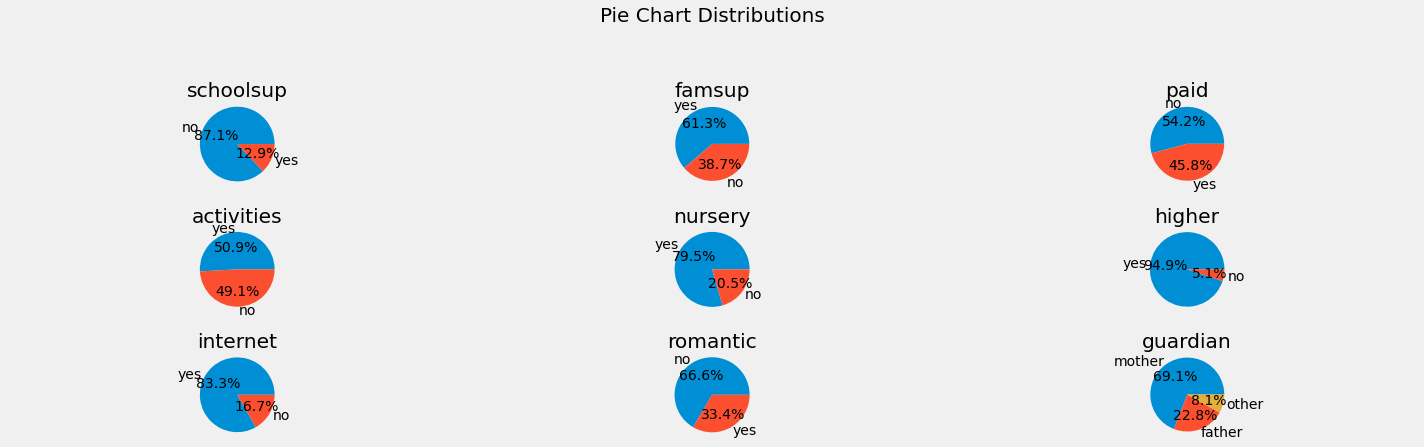

In [15]:
# bBy the help of this pie chart we can suffice that distribution of the binary values are normal.
dataset2 = dataset[['schoolsup','famsup','paid',
                    'activities', 'nursery', 'higher',
                    'internet', 'romantic','guardian']]
fig = plt.figure(figsize=(20,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

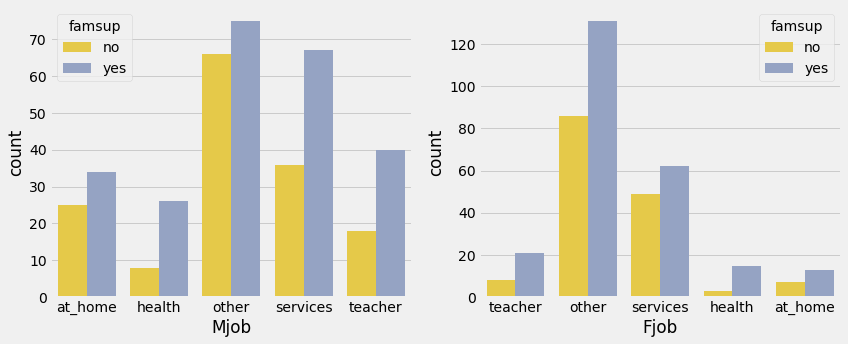

In [16]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sn.countplot(x=col,data=dataset,hue='famsup',palette='Set2_r')
    plt.tight_layout()

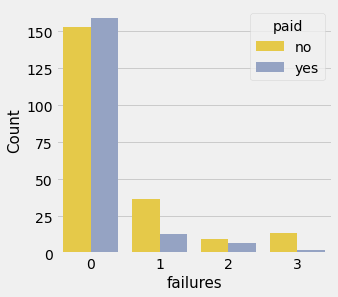

In [17]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['failures']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(13,8)
    sn.countplot(x=col,data=dataset,hue='paid',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

Text(0, 0.5, 'weekly average travel time(in hrs)')

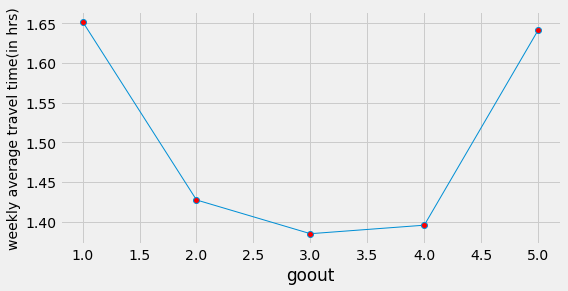

In [18]:
out=dataset.groupby('goout')['traveltime'].mean().plot.line(figsize=(8,4),
                                                      marker='o',
                                                      markerfacecolor='red',
                                                      linewidth=1)
plt.ylabel('weekly average travel time(in hrs)',fontsize=14)

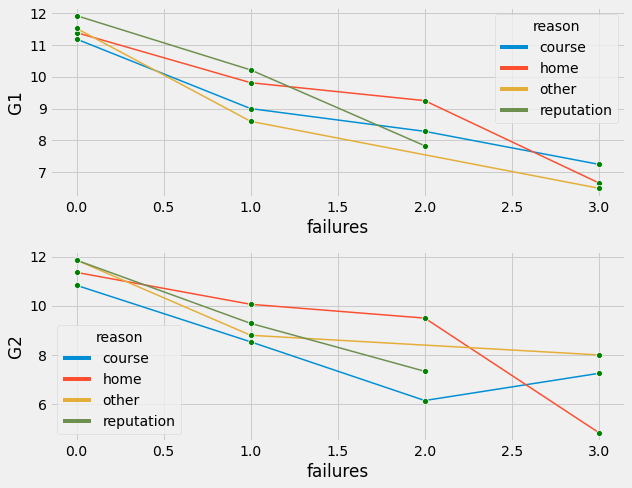

In [19]:
grades=['G1','G2']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=dataset.groupby(['reason','failures'])[col].mean()
    x=x.reset_index('failures')
    
    sn.lineplot(x='failures',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()

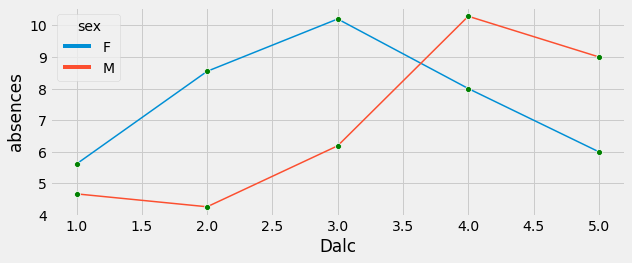

In [20]:
# We can see that in case of Male with rise of Absences the Daily Alcohol Consumption is high.
grades=['absences']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=dataset.groupby(['sex','Dalc'])[col].mean()
    x=x.reset_index('Dalc')
    
    sn.lineplot(x='Dalc',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()

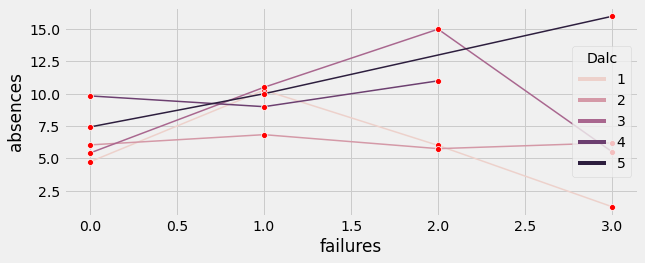

In [21]:
# We can see that Students with high Dalc rate has high co-relation between failing and absences, Whereas students with lower Dalc rate are uncertain.
grades=['absences']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=dataset.groupby(['Dalc','failures'])[col].mean()
    x=x.reset_index('failures')
    
    sn.lineplot(x='failures',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='red',linewidth=1.5)
    plt.tight_layout()

<AxesSubplot:>

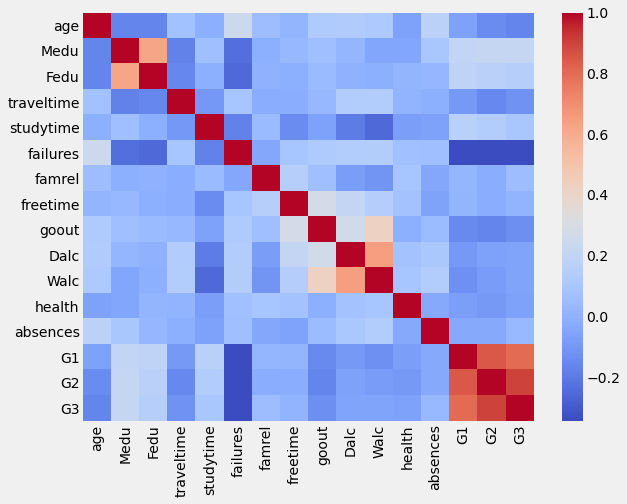

In [22]:
plt.figure(figsize=(9,7))
corr=dataset.corr()
sn.heatmap(corr,robust=True,cmap='coolwarm')

In [23]:
dataset = pd.get_dummies(dataset)

<AxesSubplot:>

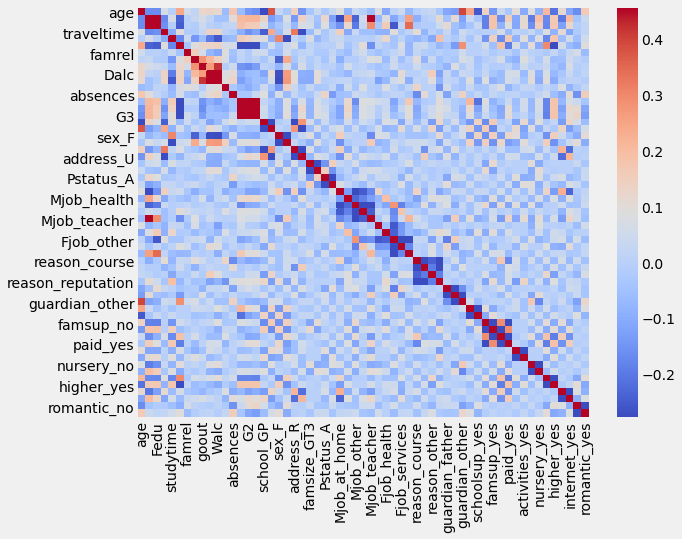

In [24]:
plt.figure(figsize=(9,7))
corr=dataset.corr()
sn.heatmap(corr,robust=True,cmap='coolwarm')

In [25]:
dataset.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [26]:
dataset.drop(columns = ['romantic_yes','internet_yes','higher_yes','nursery_yes','activities_yes','paid_yes','famsup_yes','schoolsup_yes','guardian_other','reason_other','Fjob_other','Mjob_other','Pstatus_A','famsize_LE3','sex_M','school_MS'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_father,guardian_mother,schoolsup_no,famsup_no,paid_no,activities_no,nursery_no,higher_no,internet_no,romantic_no
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,1,0,0,1,1
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,1,1,1,0,0,1
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,1,0,0,0,0,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,0,1,0,0,1,0,0,1,1
391,17,3,1,2,1,0,2,4,5,3,...,0,1,1,1,1,1,1,0,0,1
392,21,1,1,1,1,3,5,5,3,3,...,0,0,1,1,1,1,1,0,1,1
393,18,3,2,3,1,0,4,4,1,3,...,0,1,1,1,1,1,1,0,0,1


In [27]:
dataset.drop(columns =['G1','G2'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'G3'), dataset['G3'],
                                                    test_size = 0.2,
                                                    random_state = 123)


In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [35]:
from xgboost import XGBRegressor

In [36]:
dataset.head(10)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [44]:
xgb_r = XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [45]:
xgb_r.fit(X_train,y_train)

[16:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objectvie='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
y_pred = xgb_r.predict(X_test)

In [49]:
y_true = y_test

In [51]:
from sklearn.metrics import mean_squared_error as mse

In [67]:
MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)
print(MSE)
print(RMSE)

2.006240250862785
1.4164181059499292


In [56]:

from sklearn.metrics import r2_score


In [57]:
R_squared = r2_score(y_true, y_pred)

In [58]:
print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  1.42

R-Squared:  0.91



Prediction Error Plot


D:\Annaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


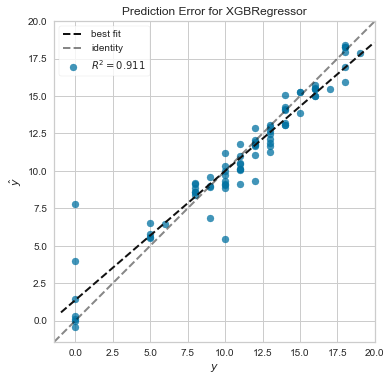

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=1, gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.05, max_delta_step=0,
                                       max_depth=3, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=100, n_jobs=2,
                                       num_parallel_tree=1,
                                       objectvie='reg:squarederror',
                                       random_state=42, reg_alpha=0,
                       

D:\Annaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\Annaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\Annaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


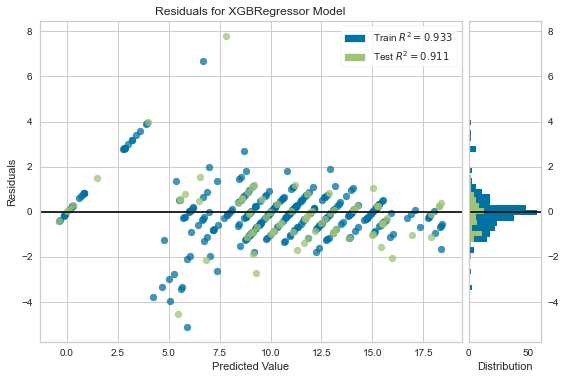

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

In [64]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
print("\nPrediction Error Plot")
print(prediction_error(xgb_r, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_r, X_train, y_train, X_test, y_test))